# Logistic Regression

### Reading Files and Loading Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

In [ ]:
#load the dataset
import pandas as pd
data = pd.read_csv("../Deep Learning/diabetes_012_health_indicators_BRFSS2015.csv")

data = data[data["Diabetes_012"] != 1]

# for item in data["Diabetes_012"]:
#     if item == 2.0:
#         data["Diabetes_012"][item] = 1.0
#     else:
#         data["Diabetes_012"] = 0.0

data['Diabetes_012'] = np.where(data['Diabetes_012']== 0, 0, 1)



In [ ]:
data.tail(5)

Exercise 1: Check for Missing Values and Duplicates and apply pre-processing that will convert 'diabetes' into a binary variable

### Fitting LR Model

Now, let's do a logistic regression example to predict patients who have diabetes based on their attributes.

In [ ]:
#install libraries
# pip install -U scikit-learn

In [ ]:
#import libraries for LR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#split data into X and Y variables
X=data.drop("Diabetes_012",axis=1)
Y=data["Diabetes_012"]

In [ ]:
#train/test split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.25 , random_state=42)

Once we split the data into training and testing sets, we fit the model

In [ ]:
#logistic regression model
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , Y_train)

Now, we make predictions based on the fitted model

In [ ]:
# make predictions on test set
y_pred=lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, Y_test)))

In [ ]:
# calculating and plotting the confusion matrix
cm = metrics.confusion_matrix(Y_test,y_pred)
#plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                #show_normed=True,
                                #colorbar=True)
cm = confusion_matrix(Y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

How should we interpret the confusion matrix?

we seem to be misclassifying diabetes patients as non-diabetic

Exercise 2: Try now to optimize the LR model by only using a subset of the variables. Does this improve the train/test accuracy?

Exercise 3: Experiment with the train/test split size and whether it is stratified. 
See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html for documentation

In [ ]:
#define metrics
y_pred_proba = lg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#calculate auc
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
auc

Exercise 4: Compare ROC curve for your various models. Which version has the highest AUC?

### LR to Neural Network

Now we will replicate the LR model above as a neural network and compare the results.

Exercise 5: Run the neural network and compare the ROC/AUC to the LR example.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

In [158]:
n_features = X_train.shape[1]
ANN_model = Sequential()
ANN_model.add(InputLayer(input_shape=(n_features, )))
ANN_model.add(Dense(2, activation = "softmax"))


In [159]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
ANN_model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [160]:
history = ANN_model.fit(X_train, Y_train, 
                        epochs=5, batch_size=32,
                        validation_split=0.25, 
                        shuffle=False)

Epoch 1/5


ValueError: in user code:

    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/Users/gabrielbattcock/opt/anaconda3/envs/tf/lib/python3.9/site-packages/keras/backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [155]:
#make predictions
preds=ANN_model.predict(X_test)

1946/1946 [==============================] - 1s 277us/step


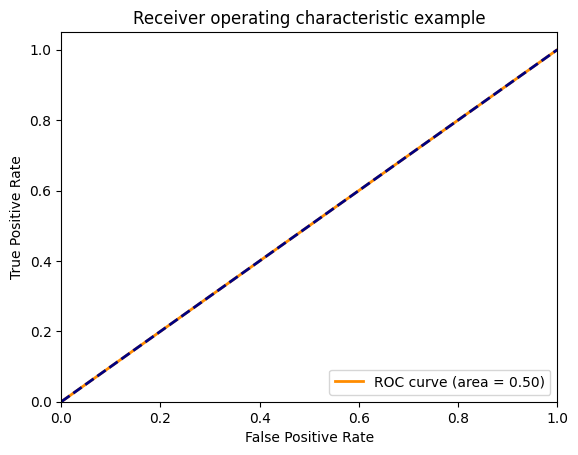

In [156]:
#plot ROC
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()